<a href="https://colab.research.google.com/github/svhenrique/ufal/blob/main/PAA/TreeSortAnalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobre o Algoritmo Tree Sort

**Sobre o algoritmo**

O algoritmo de ordenação Tree Sort é baseado na estrutura de dados Árvore de Busca Binária e retorna o input de elementos ordenados em valor crescente.

Consiste, o algoritmo, em criar uma arvore de busca binária dos elementos que serão ordenados, 
então os elementos são coletados do primeiro nó a esquerda até o ultimo nó a direita, 
quando houverem dois nós, um a esquerda e outro a direita, é coletado o da esquerda primeiro.



**Inventado em 1960**

**Complexidade:**

* Caso Médio: O(n log n) 
* Pior Caso: O(n2) - Ordenado crescentemente ou decresentemente

**Estabilidade**:
  * Como Tree Sort é baseado na Árvore de Busca Binária, ele é um algoritmo estável. 

**Interna ou Externa**:
  
O algoritmo funciona tanto para as entradas internas e externas, mas sua característica principal de árvore é ser usado para ordenação externa.

**Algoritmo Tree Sort**


1.   Reeceba os elementos de um input em um array.
2.   Criar uma árvore de busca binária inserindo os elemtos do array.
3.   Colete os elementos em ordem crescente na árvore para ordenar o array.



**Fontes:**
* https://www.geeksforgeeks.org/tree-sort/
* https://www.geeksforgeeks.org/self-balancing-binary-search-trees-comparisons/
* https://en.wikipedia.org/wiki/Self-balancing_binary_search_tree
* https://www.geeksforgeeks.org/how-to-handle-duplicates-in-binary-search-tree/
* https://www.geeksforgeeks.org/inorder-tree-traversal-without-recursion/


## Codificando

### Algoritmo com recursão

In [23]:
class No: 
  
    def __init__(self, valor): 
        self.valor = valor
        self.quantidade = 1
        self.esquerda = None
        self.direita = None

class TreeSortRecursion:
  """
    comparacoes representa o numero de comparacoes feitas na ordenacao
    operacoes representa o numero de Nos criados e vinculados a arvora
  """
  comparacoes = 0
  operacoes = 0 
  
  def _insert(self, no, valor):
      
      self.comparacoes += 1

      if no == None:
          self.operacoes += 1
          return No(valor)

      if valor == no.valor:
          (no.quantidade) += 1
          self.operacoes += 1
          return no
    
      if valor < no.valor: 
          no.esquerda = self._insert(no.esquerda, valor) 
      else:
          no.direita = self._insert(no.direita, valor)
    
      return no

  def _inorder(self, root):
    if root != None:
        self._inorder(root.esquerda)
        print('{}'.format(f' {root.valor}'*root.quantidade), 
                                 end = "") 
        self._inorder(root.direita)
  
  def insert_vector(self, valores):
    root = self._insert(None, valores[0])
    for valor in range(1, len(valores)):
      root = self._insert(root, valores[valor])
    #self._inorder(root)


### Algoritmo sem recursão

In [24]:
class No: 
  
    def __init__(self, valor): 
        self.valor = valor
        self.quantidade = 1
        self.esquerda = None
        self.direita = None
  

class TreeSortIterative:
  """
    comparacoes representa o numero de comparacoes feitas na ordenacao
    operacoes representa o numero de Nos criados e vinculados a arvora
  """

  comparacoes = 0

  def __init__(self, raiz):
    self.raiz = No(raiz)
    self.operacoes = 1

  def _insert(self, valor):

      no = self.raiz

      while True:
        
        self.comparacoes += 1

        if valor == no.valor:
          no.quantidade += 1
          self.operacoes += 1
          return no

        elif valor < no.valor:

          if no.esquerda is None:
            no.esquerda = No(valor)
            self.operacoes += 1
            return no

          no = no.esquerda

        else:

          if no.direita is None:
            no.direita = No(valor)
            self.operacoes += 1
            return no

          no = no.direita
        
  def _inorder(self):

    no = self.raiz
    pilha = []

    while True:
      
      if no is not None:
        pilha.append(no)
        no = no.esquerda

      elif no is None and len(pilha) > 0:
        no_removido = pilha.pop()
        print('{}'.format( (str(no_removido.valor)+' ') * no_removido.quantidade), end='')
        no = no_removido.direita
     
      else:
        break

  def insert_vector(self, valores):
    for valor in range(1, len(valores)):
      root = self._insert(valores[valor])
    #self._inorder()

### Abstração para rodar os algoritmos

In [25]:
# funcao para ordenar usando algoritmo com recursao
import time # biblioteca para medir tempo
def ordenar_com_recursao(valores):
  inicio = time.time()
  
  tree = TreeSortRecursion()
  tree.insert_vector(valores)
  
  fim = time.time()

  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = tree.comparacoes
  operacoes = tree.operacoes

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
      'operacoes':operacoes
  }

In [26]:
# funcao para ordenar usando algoritmo sem recursao (iterativo)

import time # biblioteca para medir tempo
def ordenar_sem_recursao(valores):

  inicio = time.time()
  raiz = valores[0]
  tree = TreeSortIterative(raiz)
  tree.insert_vector(valores)
  fim = time.time()
  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = tree.comparacoes
  operacoes = tree.operacoes

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
      'operacoes': operacoes
  }

## Testando

In [27]:
import random
from matplotlib import pyplot as plt

### 10000 elementos

In [80]:
pior_caso = list(range(10000, 0, -1))
melhor_caso = list(range(1, 10001))
medio_caso = random.sample(range(1, 1000000001), 10000) # aumentando range para coletar numeros aleatorios

#### Testando para melhor caso

In [ ]:
medio_caso.sort()
medio_caso

In [81]:
ordenar_com_recursao(melhor_caso)

RecursionError: ignored

Como a função com recursão não aceita inputs com mais de 10000, não será mais usada.
Continuaremos usando a função iterativa por esse motivo.

In [82]:
melhor = ordenar_sem_recursao(melhor_caso)
melhor

{'comparacoes': 49995000,
 'operacoes': 10000,
 'tempo em segundos': 18.495849132537842}

#### Testando para o pior caso

In [83]:
pior = ordenar_sem_recursao(pior_caso)
pior

{'comparacoes': 49995000,
 'operacoes': 10000,
 'tempo em segundos': 18.645413398742676}

#### Testando para o caso médio

In [84]:
medio = ordenar_sem_recursao(medio_caso)
medio

{'comparacoes': 161359,
 'operacoes': 10000,
 'tempo em segundos': 0.10057640075683594}

#### Comparando

Comparando os resultados dos parâmetros retornados pela função de ordenação nos 3 casos, melhor, medio e pior.

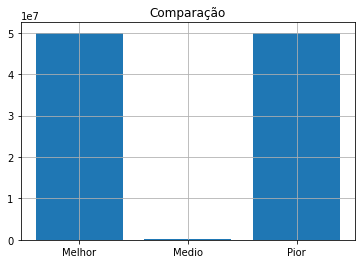

In [85]:
# comparacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['comparacoes'], medio['comparacoes'], pior['comparacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

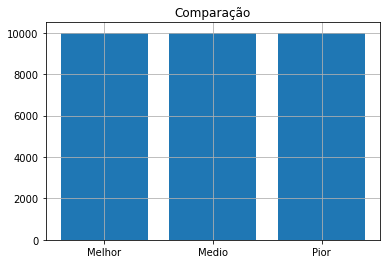

In [86]:
# operacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['operacoes'], medio['operacoes'], pior['operacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

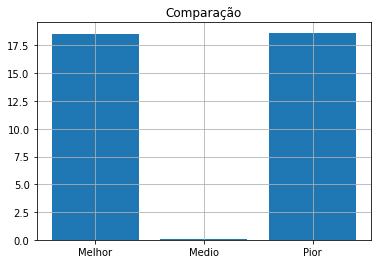

In [87]:
# tempo
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['tempo em segundos'], medio['tempo em segundos'], pior['tempo em segundos']])
plt.title('Comparação')
plt.grid(True)
plt.show()

### 100000 elementos

In [33]:
pior_caso = list(range(100000, 0, -1))
melhor_caso = list(range(1, 100001))
medio_caso = random.sample(range(1, 1000000001), 100000)

#### Testando para melhor caso

In [34]:
melhor = ordenar_sem_recursao(melhor_caso)
melhor

{'comparacoes': 4999950000,
 'operacoes': 100000,
 'tempo em segundos': 1941.6711933612823}

#### Testando para o pior caso

In [35]:
pior = ordenar_sem_recursao(pior_caso)
pior

{'comparacoes': 4999950000,
 'operacoes': 100000,
 'tempo em segundos': 1971.238587141037}

#### Testando para o caso médio

In [36]:
medio = ordenar_sem_recursao(medio_caso)
medio

{'comparacoes': 2034879,
 'operacoes': 100000,
 'tempo em segundos': 1.537031888961792}

#### Comparando

Comparando os resultados dos parâmetros retornados pela função de ordenação nos 3 casos, melhor, medio e pior.

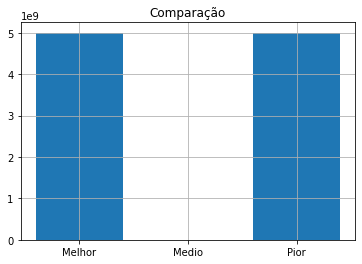

In [37]:
# comparacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['comparacoes'], medio['comparacoes'], pior['comparacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

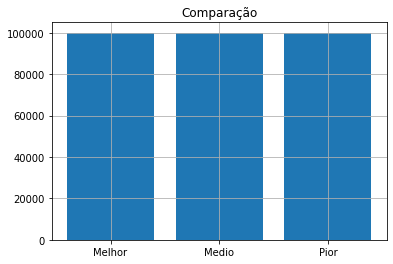

In [38]:
# operacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['operacoes'], medio['operacoes'], pior['operacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

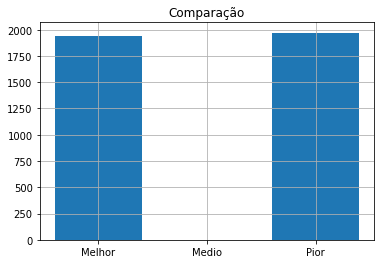

In [39]:
# tempo
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['tempo em segundos'], medio['tempo em segundos'], pior['tempo em segundos']])
plt.title('Comparação')
plt.grid(True)
plt.show()

### Analisando testes aprofundadamente

In [ ]:
piores_casos, melhores_casos, medios_casos = [], [], []

ordenar = ordenar_sem_recursao
for c in range(50):
  
  numeros = random.sample(range(1, 1000000001), 10000)

  medios_casos.append(ordenar(numeros))
  numeros.sort()
  melhores_casos.append(ordenar(numeros))
  numeros.reverse()
  piores_casos.append(ordenar(numeros))


Comparando os parâmetros individualmente.

#### Melhores casos

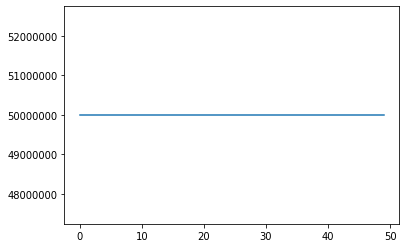

In [136]:
# comparacoes
plt.plot([analise['comparacoes'] for analise in melhores_casos])
plt.ticklabel_format(style = 'plain')
plt.show()

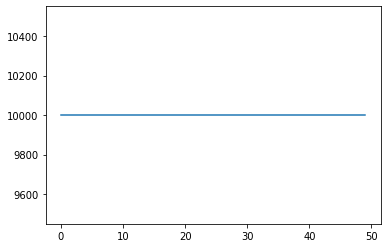

In [119]:
# operacoes
plt.plot([analise['operacoes'] for analise in melhores_casos])
plt.show()

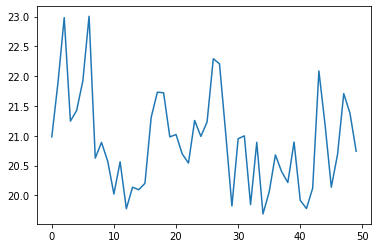

In [120]:
# tempo 
plt.plot([analise['tempo em segundos'] for analise in melhores_casos])
plt.show()

#### Medios casos

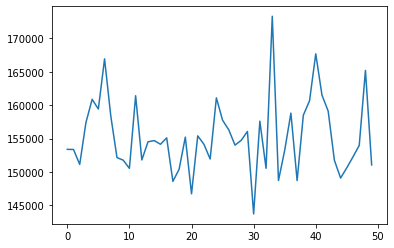

In [121]:
# comparacoes
plt.plot([analise['comparacoes'] for analise in medios_casos])
plt.show()

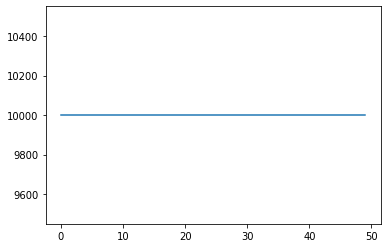

In [122]:
# comparacoes
plt.plot([analise['operacoes'] for analise in medios_casos])
plt.show()

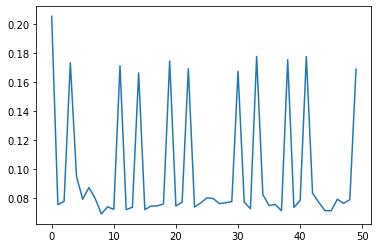

In [123]:
# comparacoes
plt.plot([analise['tempo em segundos'] for analise in medios_casos])
plt.show()

#### Piores casos

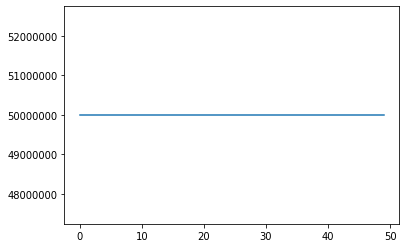

In [135]:
# comparacoes
plt.plot([analise['comparacoes'] for analise in piores_casos])
plt.ticklabel_format(style = 'plain')
plt.show()

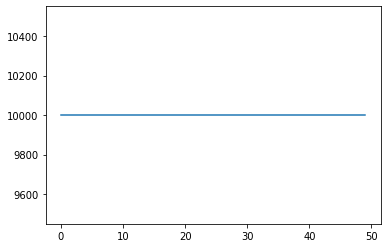

In [125]:
# comparacoes
plt.plot([analise['operacoes'] for analise in piores_casos])
plt.show()

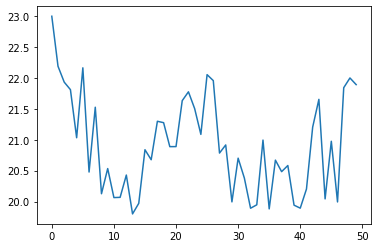

In [126]:
# tempo
plt.plot([analise['tempo em segundos'] for analise in piores_casos])
plt.show()

#### Comparando resultados

Comparando os os parâmetros entre os 3 casos.

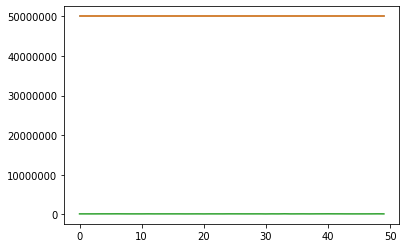

In [133]:
# comparacao 
plt.plot([analise['comparacoes'] for analise in piores_casos])
plt.plot([analise['comparacoes'] for analise in melhores_casos])
plt.plot([analise['comparacoes'] for analise in medios_casos])
plt.ticklabel_format(style = 'plain')
plt.show()

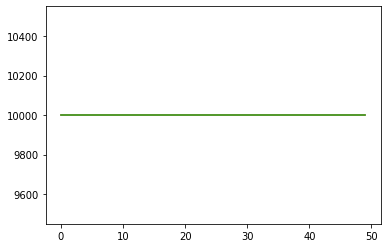

In [128]:
# operacoes 
plt.plot([analise['operacoes'] for analise in piores_casos])
plt.plot([analise['operacoes'] for analise in melhores_casos])
plt.plot([analise['operacoes'] for analise in medios_casos])
plt.show()

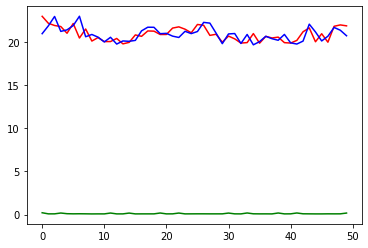

In [131]:
# tempo em segundos 
plt.plot([analise['tempo em segundos'] for analise in piores_casos], color='red')
plt.plot([analise['tempo em segundos'] for analise in melhores_casos], color='blue')
plt.plot([analise['tempo em segundos'] for analise in medios_casos], color='green')
plt.show()

## Conclusões sobre as análises

*   O número de operações sempre vai ser o mesmo do número de elementos a serem ordenados.
*   Em um input ordenado,  de forma crescente ou decrescente, o algoritmo fará mais comparações que em um desordenado.
*   Em um input ordenado,  de forma crescente ou decrescente, o algoritmo demorará mais para terminar a árvore que em um desordenado.
*   Curiosamente, se o algoritmo for utilizado talvez seja mais proveitoso desordenar a entrada antes da criação da árvore, garantindo a desordenação e acelerando o projeto para O(nlogn).


 

## Questões para futuras pesquisas



*   Existe uma implementação com melhores resultados, comparação, operações e tempo de execução quando comparamos o algoritmo com recursão e o iterativo? 
*   Analisar como o algoritmo se comporta com algum método de balancemaneot, como o AVL tree.

